In [1]:
#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading dataset

In [4]:
mydata=pd.read_csv("Fraud.csv")

In [5]:
#Data analysis

In [6]:
#Displays headings of the dataset

In [7]:
mydata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
#Datatypes information

In [9]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
#Displays the statistical data

In [11]:
mydata.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
#Checking the null values of the dataset

In [13]:
mydata.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
#Convert the object datatypes to integer using label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
LE = LabelEncoder()

In [17]:
mydata["type"]=LE.fit_transform(mydata.type)
mydata["nameOrig"]=LE.fit_transform(mydata.nameOrig)
mydata["nameDest"]=LE.fit_transform(mydata.nameDest)

In [18]:
#Check if all datatypes are converted as we have applied label encoder

In [19]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [20]:
#Correlation of the variables

In [21]:
mydata_corr = mydata.corr()

In [22]:
mydata_corr

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.000146,-0.010058,-0.010299,0.003767,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,0.000213,-0.339760,-0.352758,0.584275,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,0.000124,-0.002762,-0.007861,-0.169150,0.294137,0.459304,0.076688,0.012295
nameOrig,-0.000146,0.000213,0.000124,1.000000,-0.000648,-0.000675,-0.000256,0.000245,0.000255,-0.000464,0.000667
oldbalanceOrg,-0.010058,-0.339760,-0.002762,-0.000648,1.000000,0.998803,-0.162688,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,-0.000675,0.998803,1.000000,-0.166489,0.067812,0.041837,-0.008148,0.003776
nameDest,0.003767,0.584275,-0.169150,-0.000256,-0.162688,-0.166489,1.000000,-0.198119,-0.203992,-0.021963,-0.001122
oldbalanceDest,0.027665,-0.104679,0.294137,0.000245,0.066243,0.067812,-0.198119,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.000255,0.042029,0.041837,-0.203992,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,-0.000464,0.010154,-0.008148,-0.021963,-0.005885,0.000535,1.000000,0.044109


In [23]:
#Data Visualization

In [24]:
#Heatmap

<AxesSubplot:>

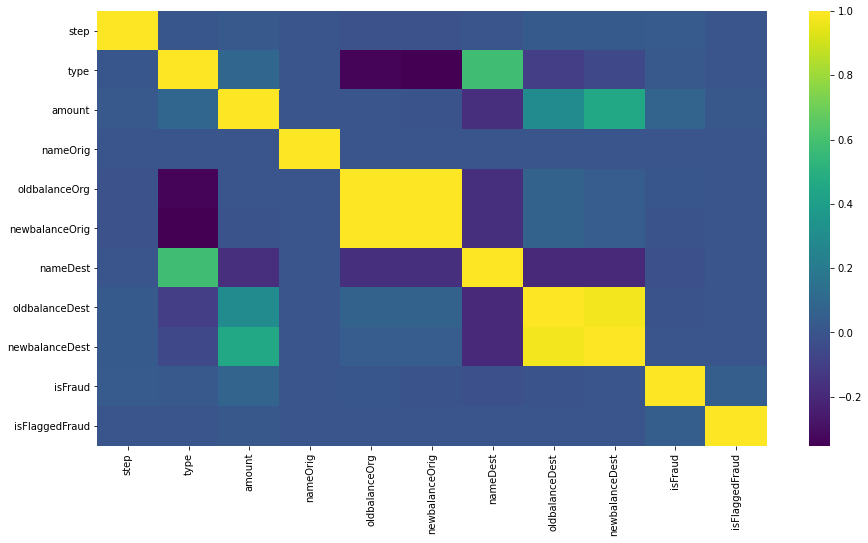

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(data=mydata_corr,annot=False,cmap='viridis')

In [26]:
#Histogram

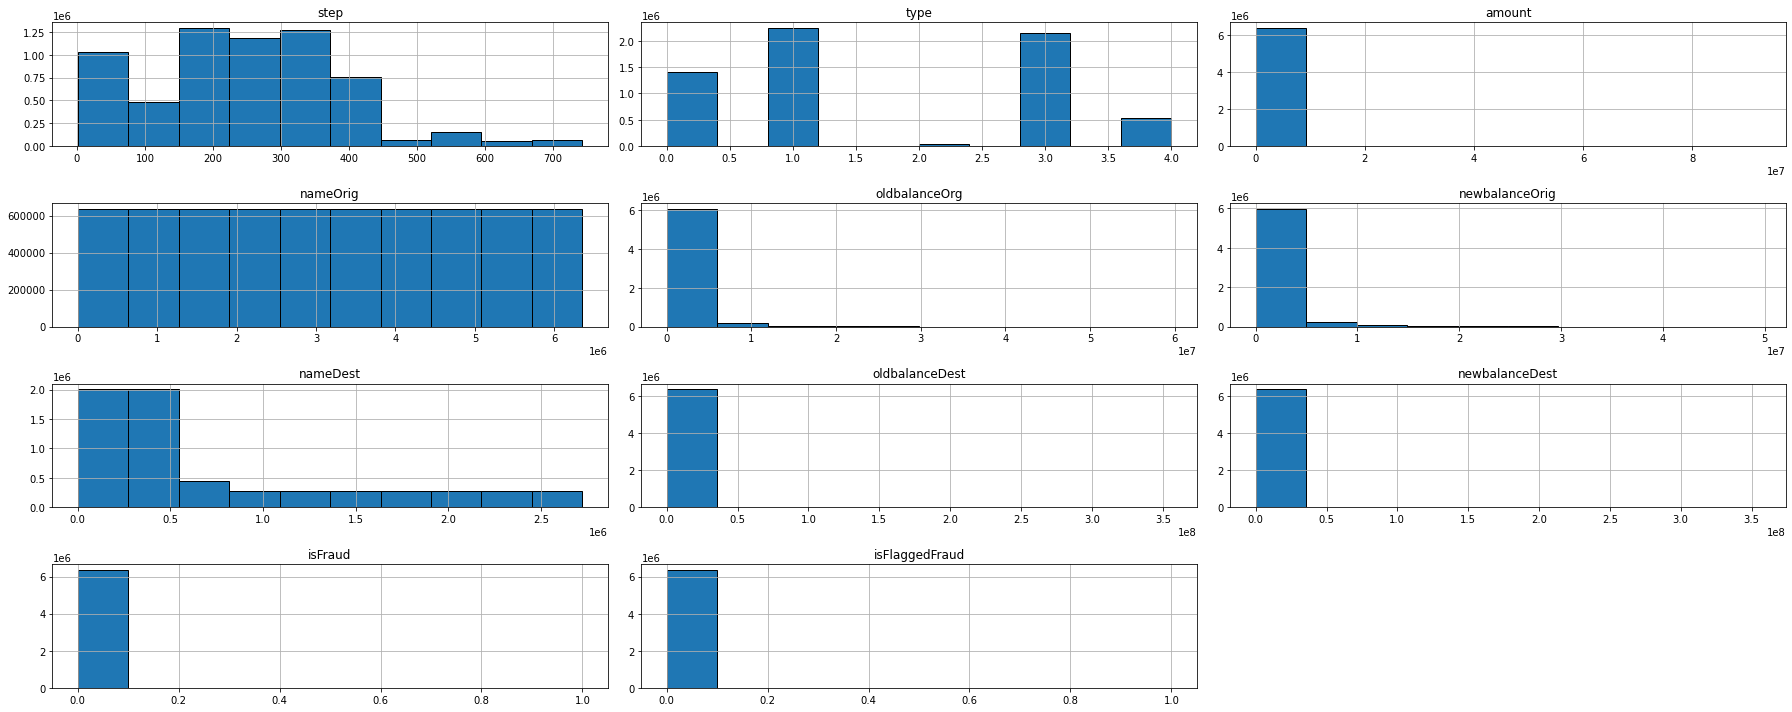

In [27]:
mydata.hist(figsize=(25,10),edgecolor='k')
plt.tight_layout()
plt.show(abs)

In [28]:
#Violin Plot

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

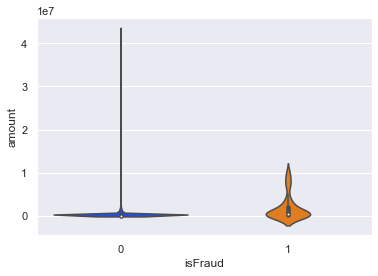

In [29]:
sns.set(style='darkgrid')
sns.violinplot(x='isFraud',y='amount',data=mydata.sample(100000),palette='bright')

In [30]:
#Joint plot

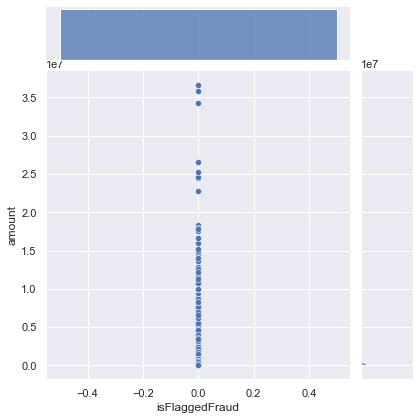

In [31]:
sns.jointplot(x='isFlaggedFraud',y='amount',data=mydata.sample(100000),palette='bright')

In [32]:
#Assigning independent and depdendent variable

In [33]:
x_ind=mydata.drop("amount",axis=1)
y_dep=mydata.amount

In [34]:
#Building OLS model

In [35]:
import statsmodels.api as sm

In [36]:
model=sm.OLS(y_dep,x_ind)

In [37]:
my_fit=model.fit()

In [38]:
my_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 amount   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                          2.004e+06
Date:                Tue, 28 Sep 2021   Prob (F-statistic):                        0.00
Time:                        23:29:53   Log-Likelihood:                     -8.9465e+07
No. Observations:             6362620   AIC:                                  1.789e+08
Df Residuals:                 6362610   BIC:                                  1.789e+08
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
step             165.3594      0.724    228.494      0.000     163.941     166.778
type            2.637e+04    118.323    222.906      0.000    2.61e+04    2.66e+04
nameOrig           0.0072   5.55e-05    129.828      0.000       0.007       0.007
oldbalanceOrg     -0.2282      0.001   -233.979      0.000      -0.230      -0.226
newbalanceOrig     0.2409      0.001    249.145      0.000       0.239       0.243
nameDest          -0.0629      0.000   -300.940      0.000      -0.063      -0.062
oldbalanceDest    -0.5951      0.000  -3394.808      0.000      -0.595      -0.595
newbalanceDest     0.6112      0.000   3753.823      0.000       0.611       0.612
isFraud         1.202e+06   3701.031    324.779      0.000    1.19e+06    1.21e+06
isFlaggedFraud  3.351e+06   7.74e+04     43.288      0.000     3.2e+06     3.5e+06
==============================================================================
Omnibus:                 10112366.792   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     847548039662.189
Skew:                          -8.658   Prob(JB):                         0.00
Kurtosis:                    1790.926   Cond. No.                     3.50e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.5e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Building regression model

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.8,random_state=2)

In [41]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [42]:
model=LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred = model.predict(x_test)

In [45]:
model.score(x_train, y_train)

0.7311829891766826

In [46]:
#Accuracy scode is 73% as per the Linear Regression

In [47]:
# Comparison of actual and  machine predicted weights

In [48]:
f_com = pd.DataFrame({"Actual" : y_test, "Machine_predicted": y_pred})
f_com

,Actual,Machine_predicted
4801897,10730.14,156580.930568
2779475,185181.59,97683.545903
784465,138902.42,147243.373052
5635648,30468.30,53820.392423
301298,14524.67,-590.618971
...,...,...
5288163,56143.31,181906.715187
33468,995457.85,121582.699814
3633581,155294.36,121311.901660
244471,179258.40,302020.388731


In [49]:
Residue = y_pred - y_test
Residue

4801897    145850.790568
2779475    -87498.044097
784465       8340.953052
5635648     23352.092423
301298     -15115.288971
               ...      
5288163    125763.405187
33468     -873875.150186
3633581    -33982.458340
244471     122761.988731
5254488     61338.876926
Name: amount, Length: 5090096, dtype: float64

In [50]:
com_g=f_com.head(23)

<AxesSubplot:>

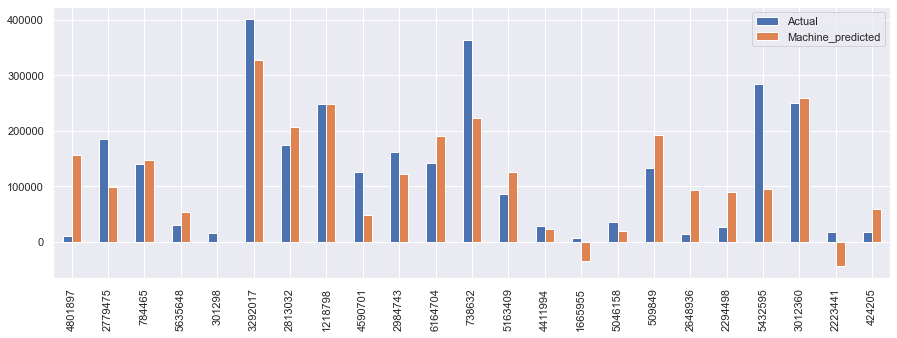

In [51]:
com_g.plot(kind="bar",figsize=(15,5))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


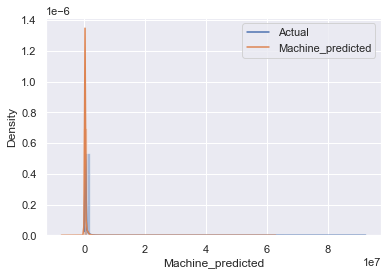

In [52]:
sns.distplot(f_com["Actual"])
sns.distplot(f_com["Machine_predicted"])
plt.legend(["Actual","Machine_predicted"])

In [53]:
model.intercept_

71734.63012836818

In [54]:
model.coef_

array([ 7.58456787e+01,  2.06904468e+04, -2.94674249e-04, -2.25981076e-01,
        2.36339741e-01, -6.97230063e-02, -5.83749720e-01,  5.99418904e-01,
        1.14392439e+06,  2.19995265e+06])

In [55]:
#Probability plot

((array([-5.14163951, -4.97245955, -4.88127758, ...,  4.88127758,
          4.97245955,  5.14163951]),
  array([-36885374.94694283, -27963899.08652383, -26592644.65459904, ...,
          36823378.67012025,  39342694.60615316,  39806498.5911709 ])),
 (166065.87938056455, -362.44141757205597, 0.538280254776317))

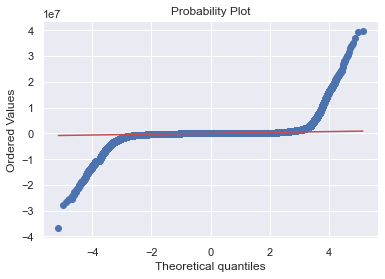

In [56]:
import scipy.stats as st
st.probplot(Residue,dist="norm",plot=plt)

In [ ]:
#Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. 

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifm

In [58]:
def calculate_vif(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF_Values']=[vifm(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [60]:
calculate_vif(mydata.sample(400000))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,features,VIF_Values
0,step,2.784211
1,type,4.443385
2,amount,4.074919
3,nameOrig,2.758456
4,oldbalanceOrg,528.427213
5,newbalanceOrig,533.717430
6,nameDest,3.298204
7,oldbalanceDest,75.727684
8,newbalanceDest,87.012262
9,isFraud,1.211643


In [61]:
#A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [ ]:
#Conclusion

#Can also perform PCA,reduce the dimension and based on the optimum value can arrive at a better conclusion.